# **Fitting a K-Nearest Neighbors (kNN) Classification model using SCiKit Learn**


Using a kNN Classification model from SciKit Learn, we can attempt to predict the incidence of diabetes cases given the 21 lifestyle factors. In order to ensure the best k value for our model we will use Cross Validation to generate a k value followed by GridSearch to hypertune it. The model will be evaulauted on its Accuracy, Precision, Recall, F1 Score, ROC Curve and AUC.

## **Importing Data and Necessary Libraries**

In order to build our kNN Classification Model we need to first import the necessary packages/libraries along with our data. Our data is sourced from Kaggle but its originally from the CDC's 2015 Behavioral Risk Factor Surveillance System  which is a large-scale survey that collects data on American's health-related risk behaviors and chronic health conditions. From the datafiles available on Kaggle, we chose to use the 50-50 split data i.e. wherein there is a 50-50 split between diabetics and non-diabetics, since the original dataset had a large skew towards non-diabetics and could potentially impact our model and its results. The dataset is cleaned and is devoid of null values, thus, can be imported as is without additional pre-processing.




Neccessary Libraries/Packages were imported such as Pandas, Numpy and MatplotLib.Pyplot as well as Scikit Learn.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

The 50-50 split dataset is imported and stored in a Pandas Dataframe. .head() is used to ensure that the data is correctly imported.

In [2]:
# load and read dataset into dataframe
diabetes_df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


The feature matrix containing the 21 lifestyle predictors and the target vector containing the Diabetes Diagnosis are defined and stored.

In [3]:
# defining feature matrix and target vector
# features are defined
X = diabetes_df.iloc[:, 1:]
print(X)
# target is defined
y = diabetes_df['Diabetes_binary']
print(y)


       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       0.0        1.0  26.0     0.0     0.0   
1         1.0       1.0        1.0  26.0     1.0     1.0   
2         0.0       0.0        1.0  26.0     0.0     0.0   
3         1.0       1.0        1.0  28.0     1.0     0.0   
4         0.0       0.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
70687     0.0       1.0        1.0  37.0     0.0     0.0   
70688     0.0       1.0        1.0  29.0     1.0     0.0   
70689     1.0       1.0        1.0  25.0     0.0     0.0   
70690     1.0       1.0        1.0  18.0     0.0     0.0   
70691     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     0.0      1.0  ...   
1                       0.0           0.0     1.0      0.0  ...   
2                       0.0           1.0     1.0      1.0  ...   
3          

## **Data Pre-processing**

In order to build our kNN model we need to first split the data into training and testing sets. The training set is used to fit the model and understand the relationship between the features and the target variable. The testing set is used to test the model's performance on previously unseen data. Here we are creating a 75/25 split with 75% of our data alloted to training set and the rest to the test set. A random state is also set to ensure that everytime the program is run we get the same results - this is helpful during model creation.

In [4]:
# Splitting data into training and test datasets
# setting random_state in order to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

Feature Normalization is a necessary component when building a kNN Classification model. This is because kNN calculates the distance between points, and when some features have larger values, this could lead to greater weightage of those features. As such, the features are normalized using the StandardScaler() in SciKit Learn. The Scaler is first fit to the training data following which it is applied to the testing data.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Finding the Best 'k' value using k-fold Cross-Validation**

In order to find the k value that ensures the best perfomance of our kNN model we use K-fold Cross-Validation. I chose to use the cross validation on the training set only, as opposed to the entire data, in order to prevent the model from seeing the test data and generating a parameter that works for the entire data set which can in turn lead to overfitting.

K fold Cross Validation of the training set implies that the training data is split into 'k' groups of which one is used as the test set. The model is trained on the rest of the groups and tested on the test set. This is repeated with each of the 'k' groups acting as the test set. The average of the accuracy scores across the 'k' times are taken.


To find the best 'k' for our kNN model, cross validation is performed on a range of k values to determine which k value yields the best score.

In [6]:
# cross-validation to find best k
from sklearn.model_selection import cross_val_score

# generate range of values to test
k_values = [i for i in range(1,31)]

# create empty list to store scores
scores = []

# create KNN model for each k value
# evaluate the model using Cross-Validation for 5 folds
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    # append score to list
    scores.append(np.mean(score))


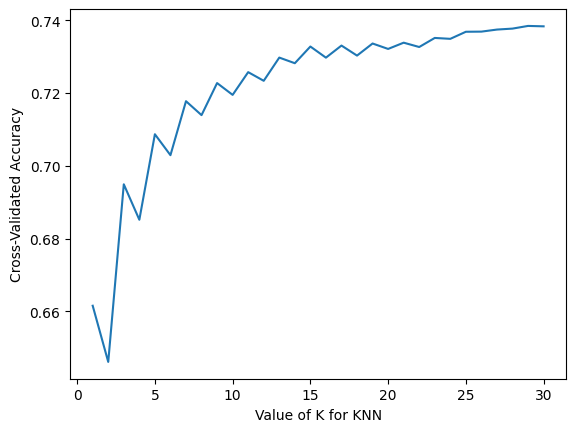

In [7]:
# plot the k values against the accuracy scores
plt.plot(k_values, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Based on the plot we can see that the accuracy scores tend to show a general increase as the k value increases, indicating a larger k value is better for model performance.

In [8]:
# find the best k value based on best score
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("Best K-value based on Cross-Validation: ", best_k)

Best K-value based on Cross-Validation:  29


The best k-value was found to be 29 implying that our kNN model looks at the 29 nearest neighbors in order to classify a new instance - in our case, to classify it as diabetic or non-diabetic.

##**kNN Classification Model**

The kNN Classification model was built using the KNeighborsClassifier from SciKit Learn and the best 'k' value found from Cross-Validation. The model was then fit to the training data. The trained model was then used to make predictions based on the test data.

In [9]:
# create and fit model with best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [10]:
# predict y values using KNN model
y_pred = knn.predict(X_test)

##**Evaluation of the Model**

Several evaluation metrics were used. Accuracy was calculated - both for the model on the training data as well as the test data. Precision, Recall, and F1 Score were also measured.

A confusion matrix was also generated in order to better visualize the model's performance.

In [11]:
# Evaluation metrics

# train accuracy
train_accuracy = metrics.accuracy_score(y_train, knn.predict(X_train))
print("Train Accuracy: ", train_accuracy)

# test accuarcy
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

# print blank line
print()

# generating precision, recall and f1 score measures
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# print the evaluation metric measures
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

# print blank line
print()

# generate a classification report to compare the evaluation metrics for each target class
report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Train Accuracy:  0.754804881268979
Test Accuracy:  0.7372828608612007

Precision:  0.7168525402726146
Recall:  0.7850277055297976
F1 Score:  0.7493927781076267

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      8830
         1.0       0.72      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



Accuracy measures the ratio of correct predictions to all predictions. The greater the accuracy the better the model is at predicting the correct outcome. The train and test accuracy were 75.48% and 73.73% respectively. This indicates that the model correctly classified instances in the training set 75.48% of the time and 73.73% of the time in the testing set. The marginal difference between the training and testing accuracies indicates that the model is neither overfitting or underfitting the training data and is able to generalize well to new and unseen test data.

Precision is the ratio of true positives to the total predicted positives. Precision measures to 71.69% indicated that when the model predicts positives (in our case diabetic patients) it predicts correctly 71.68% of the the time.

Recall is the ratio of true positives to the total actual positives. Recall measures to 78.50%, indicating that the model identifies 78.50% of actual positive (diabetic) cases.

F1 Score combines precision and recall into a single value to provide a balanced measure of a classification model's performance. It considers both false positives and false negatives. The F1 score for the kNN model comes out to be 74.94% indicating a good balance between precision and recall.


The classification report provides the Precision, Recall and F1 score for each class (0: non-diabetic; 1: diabetic) as well as the macro and weighted averages across both classes. The overall accuracy across both target classes is also provided. The overall accuracy, precision, recall and F1 score are all approximately 74%.


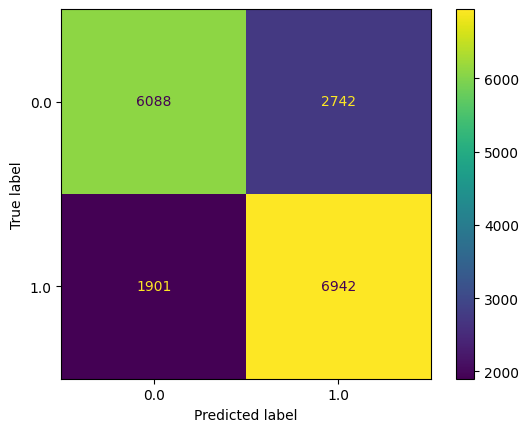

In [12]:
# visualizing confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


A confusion matrix was generated to visualize the model's performance, showing us the model's predictions vs the actual class. A confusion matrix shows the number of True Positives (correctly predicts positive class), True Negatives (correctly predicts negative class), False Positives (predicts positive class when actual class is negative) and False Negatives (predicts negative class when actual class is positive).

Based on the confusion matrix, the model had 6088 True Negatives, 6942 True Positives, 2742 False Positives and 1901 False Negatives.

##**Hyperparameter Tuning using GridSearch**

GridSearch is a method of performing hyperparameter tuning to find the optimal parameters for a given model. GridSearchCV from SciKit Learn was used. A range of hyperparameters to test is defined. A grid of those hyperparameters is created and the model is tested across all combinations of defined hyperparameters. In the case of a kNN model, the main hyperparamater under consideration is 'n_neighbors'. As such Grid Search was conducted to determine the best 'k' value.

Besides 'n_neighbors' there are other hyperparameters such as 'weights', 'metric', 'p', 'algorithm', 'leaf_size' and 'priors'.  However, to reduce computational expense, I chose to use only 'weights' (in addition to 'n_neighbors').'weights' looks at the weight of the neighbors when making predictions it can either be set to uniform (all neighbors are weighed uniformly) or distance (where closer neighbors are weighed more heavily).

In [13]:
# hyperparameter tuning with GridSearch
# defining n_neighbors and weights parameters
param_grid = {'n_neighbors': k_values, 'weights':['uniform', 'distance']}

knn2 = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn2, param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [14]:
# identifying the best parameters
best_params = knn_grid_search.best_params_
best_k = best_params['n_neighbors']
best_weights = best_params['weights']
best_score = knn_grid_search.best_score_

# displaying the best parameters
print("Best 'k' value: ", best_k)
print("Best weights value: ", best_weights)
print("Best score value: ", best_score)

Best 'k' value:  29
Best weights value:  uniform
Best score value:  0.7384145477001253


The Best 'k' value found from GridSearch matches the k-value found from Cross-Validation thus, indicating that our hyperparameters are optimized. The best weight was determined to be uniform i.e. all neighbors are equally weighted. Since uniform is the default value and the best k value is same as yielded from cross validation, it implies that our model is optimized.

##**kNN Classification Model based on Hypertuned Parameters**

Although our GridSearch Results indicate that our original model's parameters were already optimized, in order to maintain the typical workflow of building and evaluating a machine learning model, I have created an 'updated' model with the defined hyperparameters from GridSearch.

The updated kNN Classification model was built using the KNeighborsClassifier from SciKit Learn and the tuned 'k' value and 'weights' value found from Grid Search. The model was then fit to the training data. The trained model was then used to make predictions based on the test data.

In [15]:
# creating the KNN model based on tuned hyperparameter
knn3 = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
# fitting the updated model
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [16]:
# predicting y values
y_pred2 = knn3.predict(X_test)

##**Evaluating the Updated Model**

Since our model is technically the same, the evaluation metrics will yield the same results. However, to maintain the typical workflow I still have carried out evaulation metrics on the 'updated' model.

In [17]:
# Evaluation for updated model

# train accuracy
train_accuracy = metrics.accuracy_score(y_train, knn3.predict(X_train))
print("Train Accuracy: ", train_accuracy)

# test accuarcy
test_accuracy = metrics.accuracy_score(y_test, y_pred2)
print("Test Accuracy: ", test_accuracy)

# print blank line
print()

precision = metrics.precision_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
f1_score = metrics.f1_score(y_test, y_pred2)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)

# print blank line
print()

# generating classification report to compare the evaluation metrics for each class
report = metrics.classification_report(y_test, y_pred2)
print('Classification Report: \n', report)

Train Accuracy:  0.754804881268979
Test Accuracy:  0.7372828608612007

Precision:  0.7168525402726146
Recall:  0.7850277055297976
F1 Score:  0.7493927781076267

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      8830
         1.0       0.72      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



The Accuracy, Precision, Recall and F1 Measures remained the same after hypertuning.

##**ROC Curve**

A Reciever Operating Characteristic Curve is a graphical representation of the performance of a binary classifier model at varying thresholds values. It is a plot of the True Positive Rate (Recall) i.e proportion of actual positive cases correctly identified by the model against the False Positive Rate (Specificity) i.e. the proportion of actual negative cases that are incorrectly identified as positive by the model, at varying thresholds. The ROC Curve provides a measure to visualize the trade-off between sensitivity and specificity. A perfect classifier would have a curve that passes through the top left corner of the plot, indicating 100% recall and 0% specificity.

An ROC Curve was plotted for the model's performance on both the training and testing data. The Area Under the Curve (AUC) was also calculated for the ROC Curve. AUC is a summary metric - the higher the value the better the model performance.


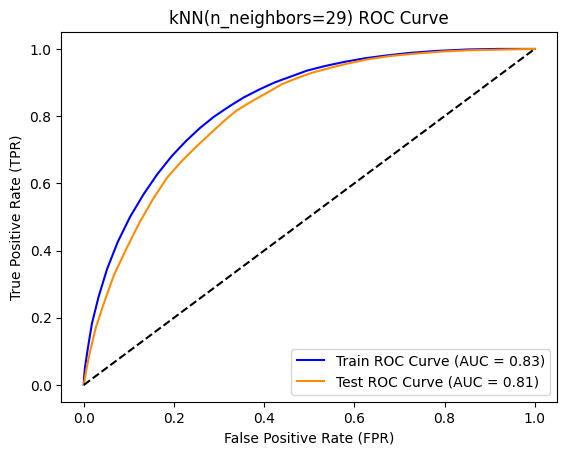

In [19]:
# plotting the ROC curve for the hypertuned kNN model
from sklearn.metrics import roc_curve

# training data
# generating probabilities for the training data
y_train_pred_proba = knn3.predict_proba(X_train)[:, 1]
# Creating the ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
# calculating the AUC value for the training curve
roc_auc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)

# testing data
# generating probabilities for the training data
y_test_pred_proba = knn3.predict_proba(X_test)[:, 1]
# creating the ROC Curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
# calculating the AUC value for the testing curve
roc_auc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)

# plotting the ROC curves for training and testing data
# displaying the AUC values for the training and testing ROC curves
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', label= f'Test ROC Curve (AUC = {roc_auc_test:.2f})')

# plotting a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# adding labels ot the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('kNN(n_neighbors=29) ROC Curve')
plt.legend(loc='lower right')

# displaying the plot
plt.show()

The plot shows the ROC Curves for both the training and testing data along with their respective AUC values. Given that both curves are relatively similar, it indicates that model is generalizable. The AUC values for the Train ROC Curve and the Test ROC Curve are 0.83 and 0.81 respectively indicating relatively high model performance.